# Neural net from scratch on custom data

> Things to remember:
1. `x` used for number of rows and `y` used for number of columns

In [ ]:
import numpy as np 

In [ ]:
# data, this ideally should be pulled from a source
# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]

# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]

# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30)]
x = np.array(x)
# Creating labels
y = np.array([[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])


In [ ]:
# This block will be used to generate random weights based on nodes
def get_weights(x, y):
    weights = []
    for i in range(x*y):
        weights.append(np.random.randn())
    return np.array(weights).reshape(x,y)

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.array(c).reshape(5, 6))


plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()




In [ ]:
class MyNet:
    def __init__(self, values, targets):
        self.values = values
        self.targets = targets 

    def sigmoid(self, x):
        return (1/(1+np.exp(-x)))
    
    def forward_prop(self,x, w1, w2):
        # You get one input layer and two weights for each layer after input
        z1 = x.dot(w1)
        a1 = self.sigmoid(z1)
        z2 = a1.dot(w2)
        output = self.sigmoid(z2)
        return output

    def loss(self, actual, predicted):
        l = (1/2) * np.sum(np.square((actual - predicted)))
        return l 

    def backward_prop(self,x, y, w1, w2, alpha):
        #alpha -> learning rate 
        # Sum of hidden layer
        z1 = x.dot(w1) 
        # inputs for output layer
        a1 = self.sigmoid(z1)

        # Sum of output layer
        z2 = a1.dot(w2)
        output = self.sigmoid(z2)

        # Calculate error at output
        d_o = output - y
        d1 = np.multiply((w2.dot((d_o.transpose()))).transpose(), 
                                   (np.multiply(a1, 1-a1)))

        w1_new = x.transpose().dot(d1)
        w2_new = a1.transpose().dot(d_o)

        # calculating new weights and updating them 
        w1 = w1-(alpha*(w1_new))
        w2 = w2-(alpha*(w2_new))
    
        return (w1, w2)

In [ ]:
def train(x, y, w1, w2, alpha):
    nn = MyNet(values=x, targets=y)
    loss = []
    accs = []
    epoches = 100
    for i in range(epoches):
        l = []
        # loop through all the inputs. 
        for j in range(len(x)):
            output = nn.forward_prop(x[j], w1, w2)
            l.append(nn.loss(output[0],y[j]))
            w1, w2 = nn.backward_prop(x[j], y[j], w1, w2,alpha)
        acc = (1-(sum(l)/len(x)))*100
        print(f"Epoch {i+1} Completed and accuracy === {acc}")
        accs.append(acc)
        loss.append(sum(l)/len(x))
    return (loss, acc, w1, w2)


In [ ]:
w1 = get_weights(30, 5)
w2 = get_weights(5, 3)

In [ ]:
response = train(x, y, w1, w2, alpha=0.1)

In [ ]:
def predict(x,y,w1, w2):
    nn = MyNet(values=x, targets=y)
    Out = nn.forward_prop(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]).any():
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()  

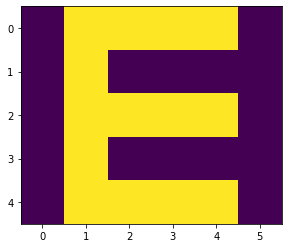

In [218]:
test_x = [0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

test_x = np.array(test_x).reshape(1,30)
plt.imshow(test_x.reshape(5,6))

Image is of letter B.


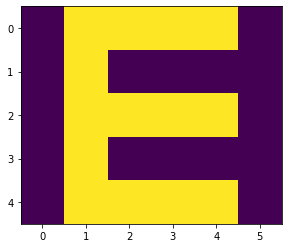

In [219]:
(loss, acc, w1, w2) = response
predict(test_x, y, w1=w1, w2=w2)

#### Works well with unknown digits and alphabets.
- As you can see, E is rightly predicted to be as B. 
- A thicker lined C is still being predicted to be as C.